# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

^C
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

ModuleNotFoundError: No module named 'numpy'

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
print("Shape of the DataFrame:", df_data.shape)

Shape of the DataFrame: (4324, 9)


In [10]:
df_data.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'Organisation',
 'Location',
 'Date',
 'Detail',
 'Rocket_Status',
 'Price',
 'Mission_Status']

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [11]:
print("Missing Values:")
print(df_data.isna().sum())

Missing Values:
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [12]:
print("Duplicate Rows:", df_data.duplicated().sum())

Duplicate Rows: 0


## Descriptive Statistics

In [13]:
print(df_data.describe(include='all'))


        Unnamed: 0.1  Unnamed: 0 Organisation  \
count       4,324.00    4,324.00         4324   
unique           NaN         NaN           56   
top              NaN         NaN    RVSN USSR   
freq             NaN         NaN         1777   
mean        2,161.50    2,161.50          NaN   
std         1,248.38    1,248.38          NaN   
min             0.00        0.00          NaN   
25%         1,080.75    1,080.75          NaN   
50%         2,161.50    2,161.50          NaN   
75%         3,242.25    3,242.25          NaN   
max         4,323.00    4,323.00          NaN   

                                          Location  \
count                                         4324   
unique                                         137   
top     Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq                                           235   
mean                                           NaN   
std                                            NaN   
min                              

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
org_counts = df_data['Organisation'].value_counts().head(20)
print(org_counts)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
Name: count, dtype: int64


<ipython-input-15-dc4d57d25b83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=org_counts.values, y=org_counts.index, palette='viridis')


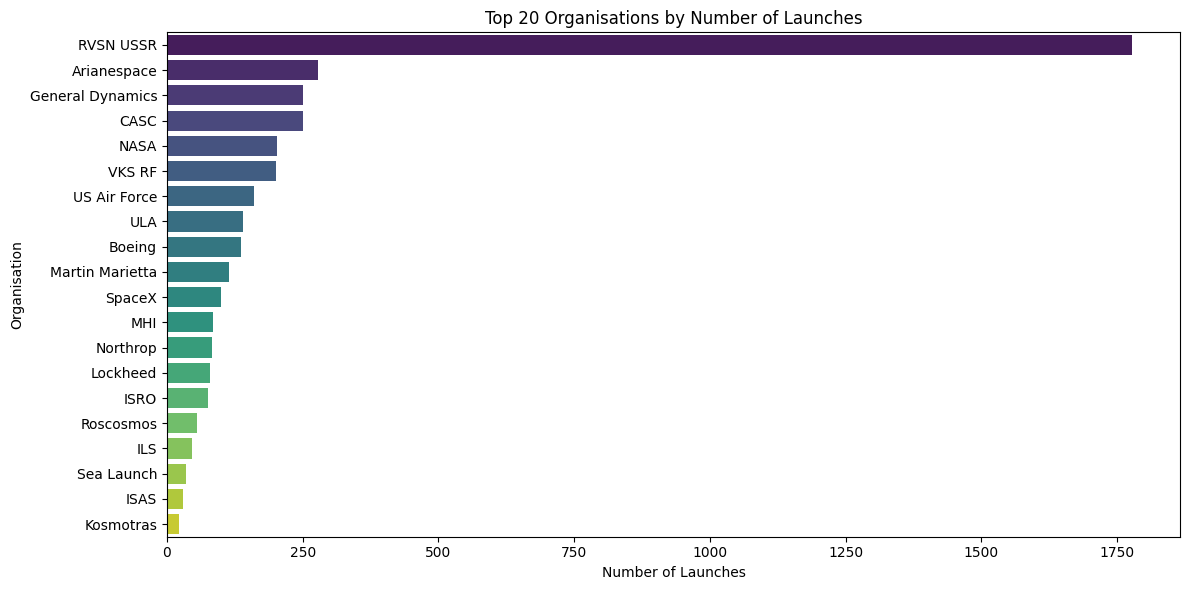

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=org_counts.values, y=org_counts.index, palette='viridis')
plt.title('Top Organisations by Number of Launches')
plt.xlabel('Number of Launches')
plt.ylabel('Organisation')
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [19]:
rocket_status_counts = df_data['Rocket_Status'].value_counts()
print(rocket_status_counts)

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


<ipython-input-20-ba0a89b8aa41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rocket_status_counts.index, y=rocket_status_counts.values, palette='Set1')


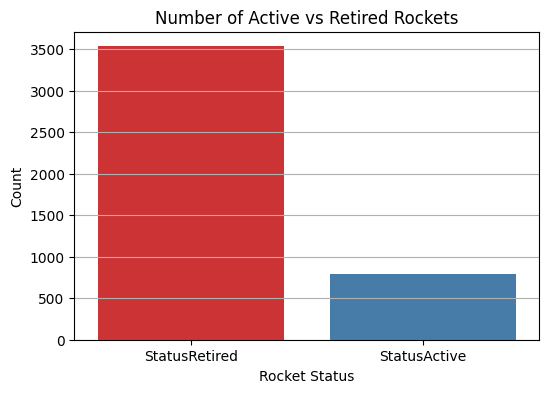

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x=rocket_status_counts.index, y=rocket_status_counts.values, palette='Set1')
plt.title('Number of Active vs Retired Rockets')
plt.xlabel('Rocket Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
mission_counts = df_data['Mission_Status'].value_counts()
print(mission_counts)

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


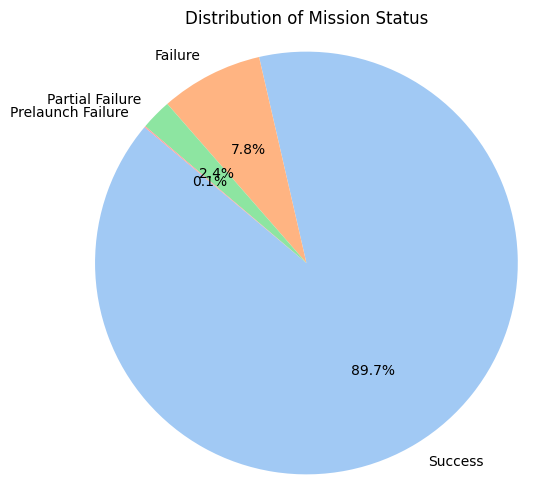

In [22]:
plt.figure(figsize=(6,6))
plt.pie(mission_counts, labels=mission_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Mission Status')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [28]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
price_data = df_data['Price'].dropna()
print(price_data)

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 949, dtype: float64


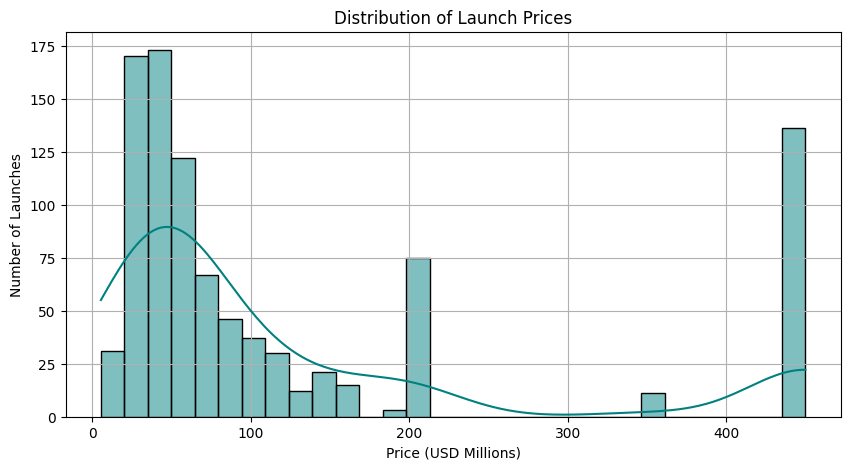

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(price_data, bins=30, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of Launch Prices')
plt.xlabel('Price (USD Millions)')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [33]:
import plotly.express as px
from iso3166 import countries_by_name
import numpy as np

In [34]:
# Extract last word in location as proxy for country
df_data['Country'] = df_data['Location'].apply(lambda x: x.split(',')[-1].strip())

# Manual corrections
replacements = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}
df_data['Country'] = df_data['Country'].replace(replacements)


In [35]:
# Function to get alpha-3 country code
def get_alpha3(country_name):
    try:
        return countries_by_name[country_name.upper()].alpha3
    except KeyError:
        return np.nan

# Apply conversion
df_data['Country_Code'] = df_data['Country'].apply(get_alpha3)

# Drop rows with unknown country codes
df_clean = df_data.dropna(subset=['Country_Code'])


In [36]:
# Group by country code
country_launch_counts = df_clean['Country_Code'].value_counts().reset_index()
country_launch_counts.columns = ['iso_alpha', 'Launch_Count']

# Plotly choropleth
fig = px.choropleth(
    country_launch_counts,
    locations='iso_alpha',
    color='Launch_Count',
    color_continuous_scale='matter',
    title='Number of Launches by Country',
    labels={'Launch_Count': 'Number of Launches'},
    projection='natural earth'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [39]:
failures_df = df_clean[df_clean['Mission_Status'] == 'Failure']
print(failures_df)
country_failure_counts = failures_df['Country_Code'].value_counts().reset_index()
print(country_failure_counts)
country_failure_counts.columns = ['iso_alpha', 'Failure_Count']

      Unnamed: 0.1  Unnamed: 0 Organisation  \
11              11          11       ExPace   
15              15          15   Rocket Lab   
36              36          36         CASC   
43              43          43         CASC   
124            124         124  Arianespace   
...            ...         ...          ...   
4286          4286        4286    RVSN USSR   
4295          4295        4295    RVSN USSR   
4298          4298        4298    RVSN USSR   
4301          4301        4301    RVSN USSR   
4315          4315        4315    RVSN USSR   

                                               Location  \
11      Site 95, Jiuquan Satellite Launch Center, China   
15      Rocket Lab LC-1A, M?hia Peninsula, New Zealand   
36         LC-2, Xichang Satellite Launch Center, China   
43      LC-201, Wenchang Satellite Launch Center, China   
124   ELV-1 (SLV), Guiana Space Centre, French Guian...   
...                                                 ...   
4286          Site 1/5

In [41]:
fig = px.choropleth(
    country_failure_counts,
    locations='iso_alpha',
    color='Failure_Count',
    color_continuous_scale='matter',
    title='Number of Failed Launches by Country',
    labels={'Failure_Count': 'Failed Launches'},
    projection='natural earth'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [43]:
# Ensure required fields are clean
sunburst_df = df_clean.dropna(subset=['Country', 'Organisation', 'Mission_Status'])

# Create the sunburst chart
import plotly.express as px

fig = px.sunburst(
    sunburst_df,
    path=['Country', 'Organisation', 'Mission_Status'],
    values=None,  # counts automatically
    color='Mission_Status',
    color_discrete_map={
        'Success': 'green',
        'Failure': 'red',
        'Partial Failure': 'orange',
        'Prelaunch Failure': 'gray'
    },
    title='Sunburst Chart: Country → Organisation → Mission Status'
)

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()


In [46]:
import plotly.express as px

# Get a list of unique countries
unique_countries = df_clean['Country'].dropna().unique()

# Loop through and plot each one
for country in unique_countries:
    country_df = df_clean[df_clean['Country'] == country]

    if len(country_df) < 5:
        continue

    fig = px.sunburst(
        country_df,
        path=['Organisation', 'Mission_Status'],
        color='Mission_Status',
        color_discrete_map={
            'Success': 'green',
            'Failure': 'red',
            'Partial Failure': 'orange',
            'Prelaunch Failure': 'gray'
        },
        title=f'{country} — Organisation → Mission Status',
    )

    fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
    fig.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-46-5405c67e160d>, line 21)

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [50]:
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

      Unnamed: 0.1  Unnamed: 0 Organisation  \
1                1           1         CASC   
3                3           3    Roscosmos   
5                5           5         CASC   
6                6           6    Roscosmos   
9                9           9         JAXA   
...            ...         ...          ...   
2041          2041        2041         CASC   
2101          2101        2101         CASC   
2177          2177        2177         CASC   
2249          2249        2249         CASC   
2309          2309        2309         CASC   

                                               Location  \
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
5          LC-9, Taiyuan Satellite Launch Center, China   
6            Site 31/6, Baikonur Cosmodrome, Kazakhstan   
9                LA-Y1, Tanegashima Space Center, Japan   
...                                                 ...   
2041  Site 138 (LA-2B)

<ipython-input-50-01f379f12e42>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
price_df = df_clean.dropna(subset=['Price'])

In [52]:
org_spending = price_df.groupby('Organisation')['Price'].sum().sort_values(ascending=False).head(20)

<ipython-input-53-bcba35cf563b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




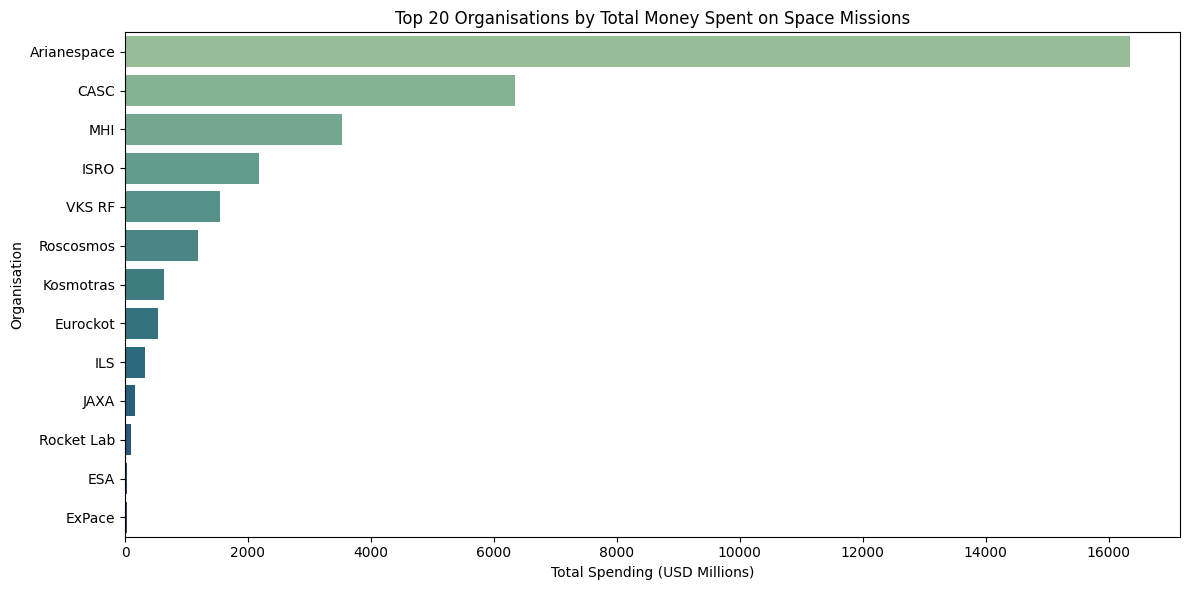

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=org_spending.values, y=org_spending.index, palette='crest')
plt.title('Top 20 Organisations by Total Money Spent on Space Missions')
plt.xlabel('Total Spending (USD Millions)')
plt.ylabel('Organisation')
plt.tight_layout()
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [55]:
avg_spending_per_launch = price_df.groupby('Organisation')['Price'].mean().sort_values(ascending=False).head(20)

<ipython-input-56-dc98b085203b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




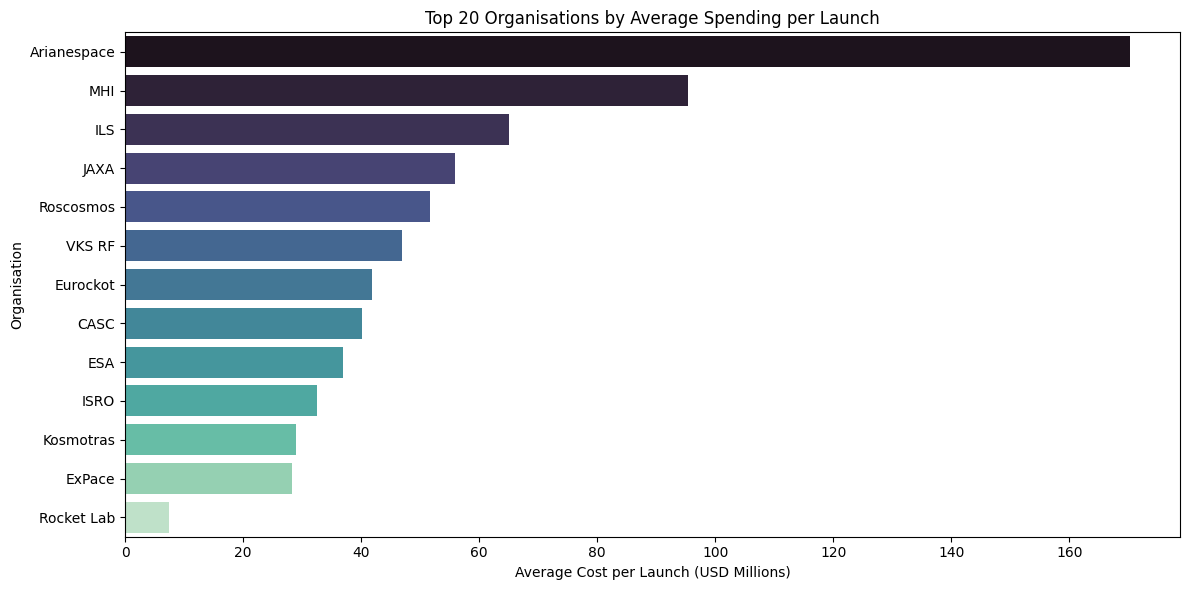

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=avg_spending_per_launch.values, y=avg_spending_per_launch.index, palette='mako')
plt.title('Top 20 Organisations by Average Spending per Launch')
plt.xlabel('Average Cost per Launch (USD Millions)')
plt.ylabel('Organisation')
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [59]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Year'] = df_clean['Date'].dt.year

# Count number of launches per year
launches_per_year = df_clean['Year'].value_counts().sort_index()
print(launches_per_year)

Year
1,957.00     2
1,958.00     5
1,959.00     4
1,960.00     8
1,961.00     9
            ..
2,016.00    62
2,017.00    61
2,018.00    83
2,019.00    79
2,020.00    40
Name: count, Length: 64, dtype: int64


<ipython-input-59-04fdf4442bd9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-04fdf4442bd9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



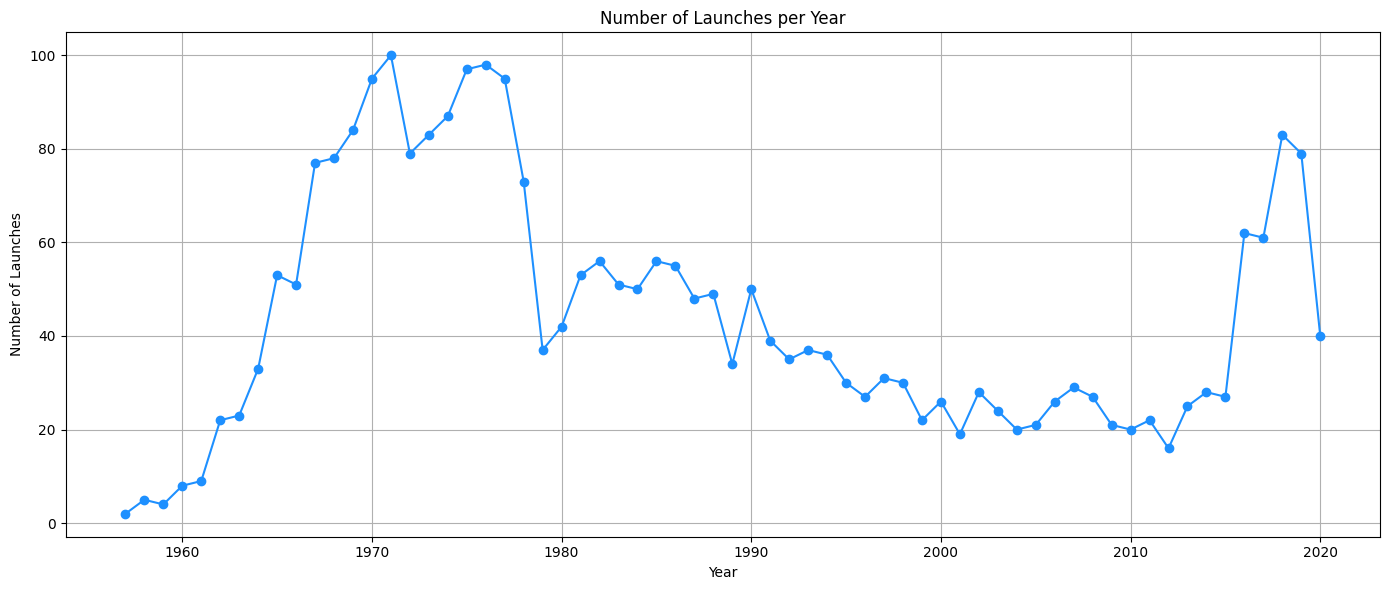

In [60]:
plt.figure(figsize=(14,6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', color='dodgerblue')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [62]:
# Create 'Year-Month' period column
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M').astype(str)

# Count launches per Year-Month
monthly_launches = df_clean['YearMonth'].value_counts().sort_index()
print(monthly_launches)

# Convert to DataFrame for plotting
monthly_df = monthly_launches.reset_index()
monthly_df.columns = ['YearMonth', 'Launch_Count']
monthly_df['YearMonth'] = pd.to_datetime(monthly_df['YearMonth'])

# Calculate rolling average (e.g., 6-month window)
monthly_df['Rolling_Avg'] = monthly_df['Launch_Count'].rolling(window=6).mean()
print(monthly_df)

YearMonth
1957-10     1
1957-11     1
1958-04     1
1958-05     1
1958-09     1
           ..
2020-05     6
2020-06     4
2020-07    11
2020-08     1
NaT        87
Name: count, Length: 700, dtype: int64
     YearMonth  Launch_Count  Rolling_Avg
0   1957-10-01             1          NaN
1   1957-11-01             1          NaN
2   1958-04-01             1          NaN
3   1958-05-01             1          NaN
4   1958-09-01             1          NaN
..         ...           ...          ...
695 2020-05-01             6         6.00
696 2020-06-01             4         4.67
697 2020-07-01            11         5.67
698 2020-08-01             1         5.00
699        NaT            87        18.67

[700 rows x 3 columns]


<ipython-input-62-2cbecbe33617>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-62-2cbecbe33617>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-66-26652596a3da>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-66-26652596a3da>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



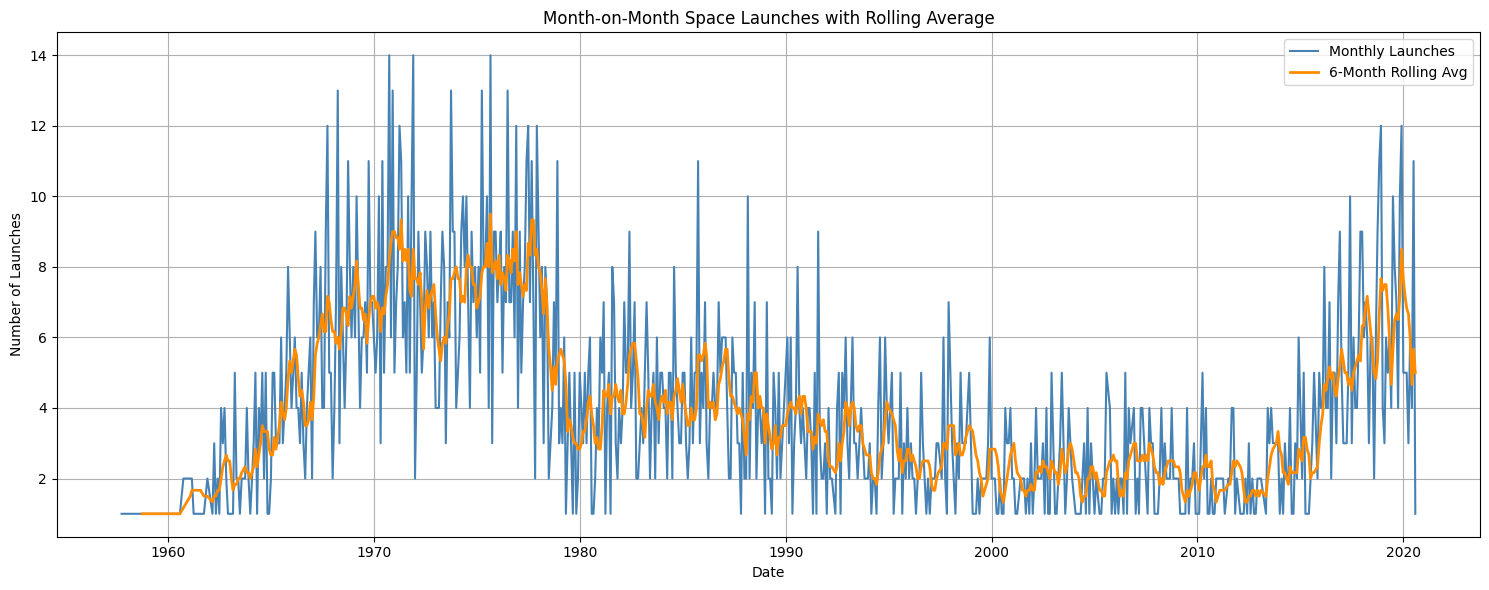

📌 Highest Launches: 14 in October 1970


In [66]:
# Create Year-Month column (as datetime)
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M').dt.to_timestamp()

# Count launches per month
monthly_launches = df_clean.groupby('YearMonth').size().reset_index(name='Launch_Count')

# Rolling average (6-month)
monthly_launches['Rolling_Avg'] = monthly_launches['Launch_Count'].rolling(window=6).mean()


plt.figure(figsize=(15,6))
plt.plot(monthly_launches['YearMonth'], monthly_launches['Launch_Count'], label='Monthly Launches', color='steelblue')
plt.plot(monthly_launches['YearMonth'], monthly_launches['Rolling_Avg'], label='6-Month Rolling Avg', color='darkorange', linewidth=2)
plt.title('Month-on-Month Space Launches with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Safely print peak month
max_row = monthly_launches.loc[monthly_launches['Launch_Count'].idxmax()]
peak_month = max_row['YearMonth'].strftime('%B %Y')
print(f"📌 Highest Launches: {max_row['Launch_Count']} in {peak_month}")


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

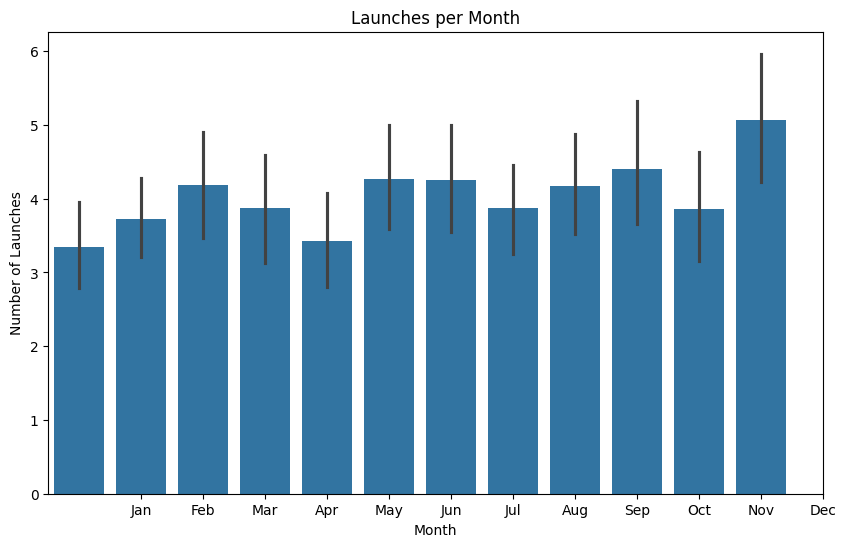

Date
1.00     174
2.00     216
3.00     230
4.00     236
5.00     202
6.00     252
7.00     247
8.00     236
9.00     242
10.00    269
11.00    220
12.00    304
Name: count, dtype: int64


In [68]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_launches['YearMonth'].dt.month, y=monthly_launches['Launch_Count'])
plt.title('Launches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# The total launches per month
monthly_counts = df_clean['Date'].dt.month.value_counts().sort_index()
print(monthly_counts)


In [69]:
# Print the most and least popular months
most_popular_month = monthly_counts.idxmax()
least_popular_month = monthly_counts.idxmin()

print(f"Most popular month for launches: {most_popular_month}")
print(f"Least popular month for launches: {least_popular_month}")

Most popular month for launches: 12.0
Least popular month for launches: 1.0


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [70]:
average_price_by_year = df_clean.groupby(df_clean['Date'].dt.year)['Price'].mean().reset_index()
print(average_price_by_year)

       Date  Price
0  1,957.00    NaN
1  1,958.00    NaN
2  1,959.00    NaN
3  1,960.00    NaN
4  1,961.00    NaN
..      ...    ...
59 2,016.00  67.46
60 2,017.00  66.42
61 2,018.00  55.81
62 2,019.00  50.82
63 2,020.00  50.62

[64 rows x 2 columns]


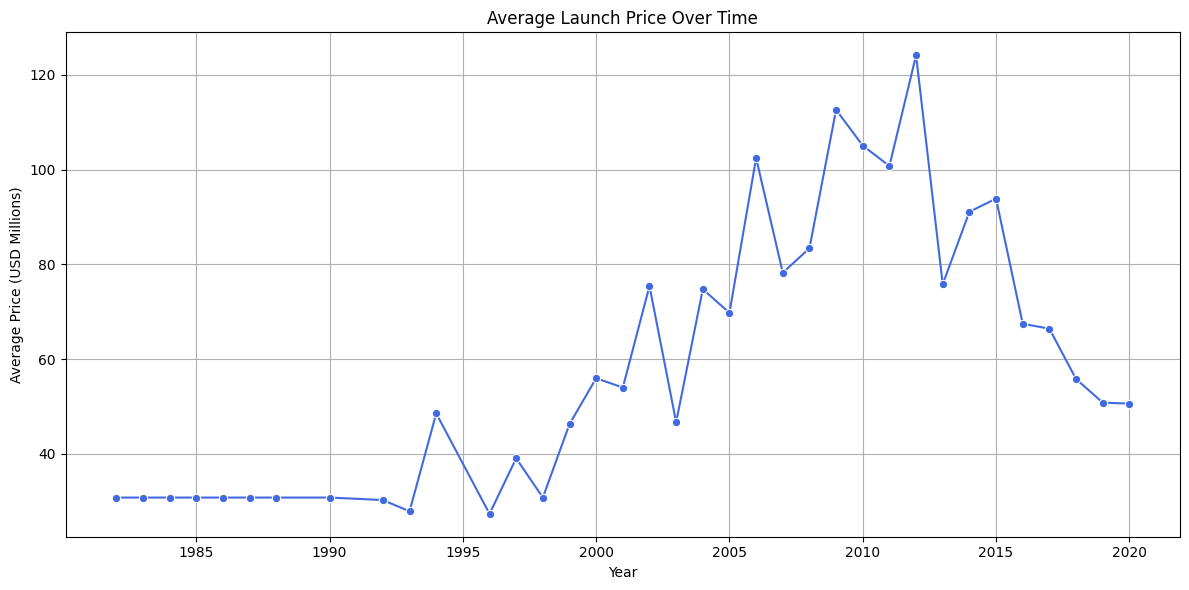

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=average_price_by_year, marker='o', color='royalblue')
plt.title('Average Launch Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (USD Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [72]:
top_10_orgs = df_clean['Organisation'].value_counts().head(10).index

In [74]:
filtered_df = df_clean[df_clean['Organisation'].isin(top_10_orgs)]
launches_by_year_org = filtered_df.groupby([filtered_df['Date'].dt.year, 'Organisation'])['Organisation'].count().reset_index(name='Launch_Count')

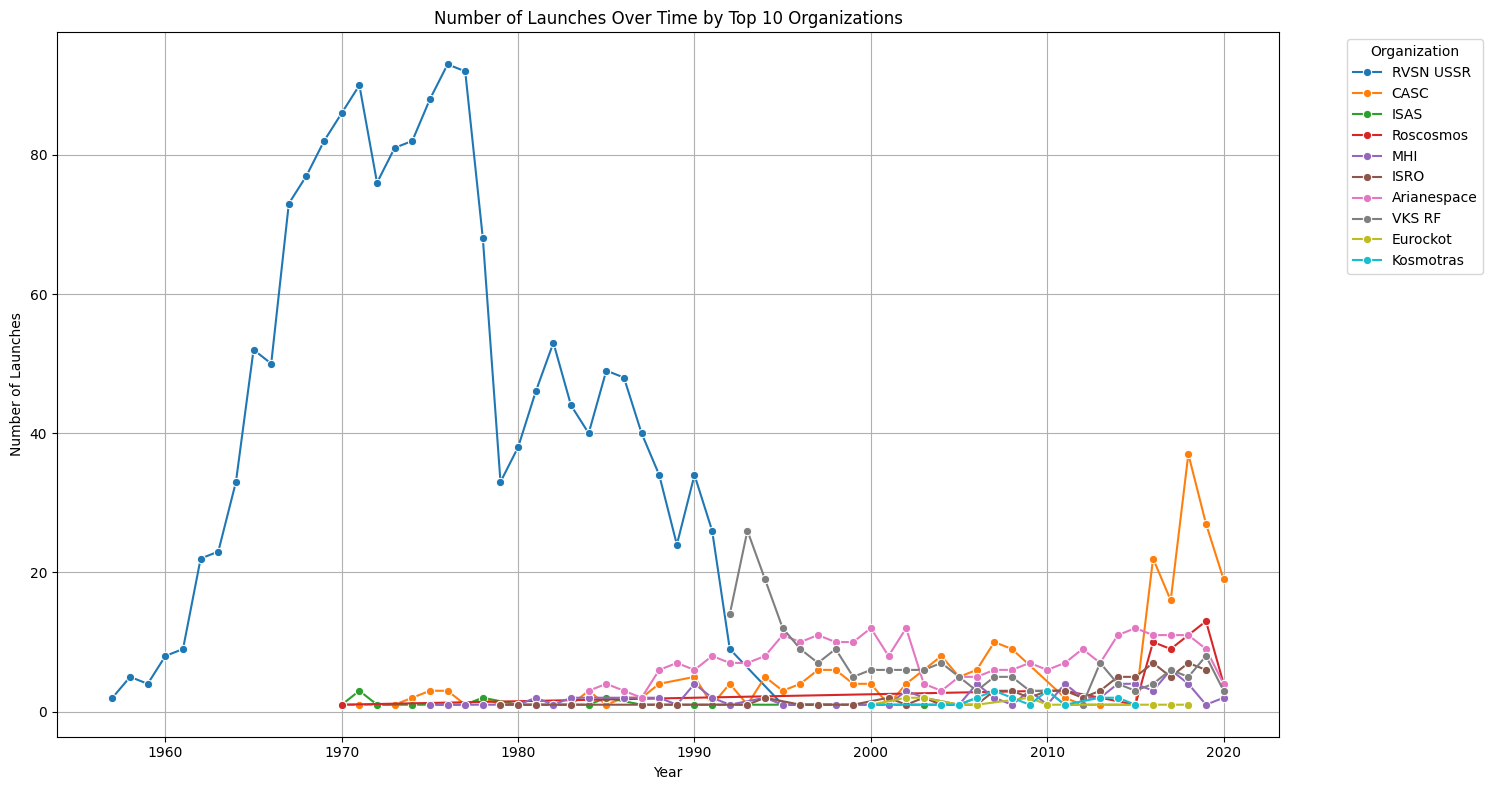

In [75]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Launch_Count', hue='Organisation', data=launches_by_year_org, marker='o')
plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [77]:
cold_war_df = df_clean[df_clean['Date'].dt.year <= 1991]

# Combine USSR and former Soviet Republics
ussr_countries = ['USSR', 'Russian Federation', 'Kazakhstan']
cold_war_df['Country'] = cold_war_df['Country'].apply(lambda x: 'USSR' if x in ussr_countries else x)

# Count launches for USA and USSR
country_launch_counts = cold_war_df['Country'].value_counts().reset_index()
country_launch_counts.columns = ['Country', 'Launch_Count']

# Filter for USA and USSR
usa_ussr_counts = country_launch_counts[country_launch_counts['Country'].isin(['USA', 'USSR'])]
print(usa_ussr_counts)

  Country  Launch_Count
0    USSR          1709


<ipython-input-77-a6aa441286c2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
fig = px.pie(
    usa_ussr_counts,
    values='Launch_Count',
    names='Country',
    title='Total Launches during Cold War: USA vs USSR',
    color_discrete_sequence=['blue', 'red']  # Customize colors if desired
)

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [81]:
ussr_countries = ['USSR', 'Russian Federation', 'Kazakhstan']
df_clean['Country'] = df_clean['Country'].apply(lambda x: 'USSR' if x in ussr_countries else x)

# Filter data for USA and USSR
usa_ussr_df = df_clean[df_clean['Country'].isin(['USA', 'USSR'])]

# Group by year and country, then count launches
launches_by_year_country = usa_ussr_df.groupby([usa_ussr_df['Date'].dt.year, 'Country'])['Country'].count().reset_index(name='Launch_Count')


<ipython-input-81-e4f05fcdd2da>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



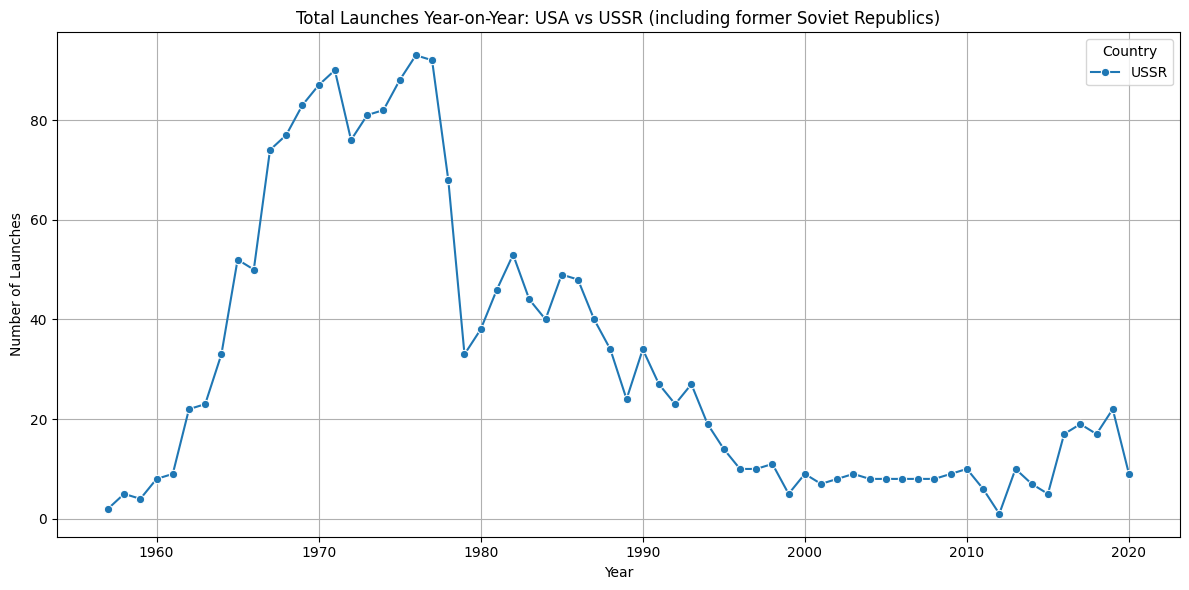

In [82]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Launch_Count', hue='Country', data=launches_by_year_country, marker='o')
plt.title('Total Launches Year-on-Year: USA vs USSR (including former Soviet Republics)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

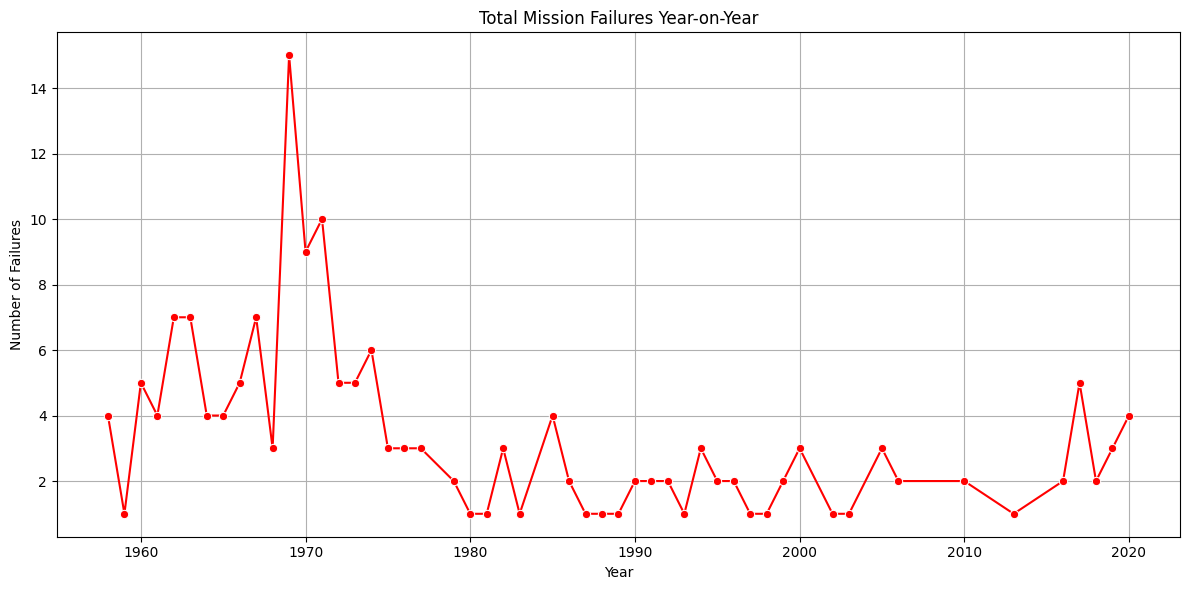

In [84]:
failures_df = df_clean[df_clean['Mission_Status'] == 'Failure']

# Group by year and count failures
failures_by_year = failures_df.groupby(failures_df['Date'].dt.year)['Mission_Status'].count().reset_index(name='Failure_Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Failure_Count', data=failures_by_year, marker='o', color='red')
plt.title('Total Mission Failures Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.grid(True)
plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [85]:
# Group by year and count total launches and failures
launches_by_year = df_clean.groupby(df_clean['Date'].dt.year)['Mission_Status'].count().reset_index(name='Total_Launches')
failures_by_year = df_clean[df_clean['Mission_Status'] == 'Failure'].groupby(df_clean['Date'].dt.year)['Mission_Status'].count().reset_index(name='Failure_Count')

In [87]:
# Merge the two DataFrames
failure_percentage_by_year = pd.merge(launches_by_year, failures_by_year, on='Date', how='left')
failure_percentage_by_year['Failure_Count'] = failure_percentage_by_year['Failure_Count'].fillna(0)  # Fill NaN with 0 for years with no failures
failure_percentage_by_year['Failure_Percentage'] = (failure_percentage_by_year['Failure_Count'] / failure_percentage_by_year['Total_Launches']) * 100

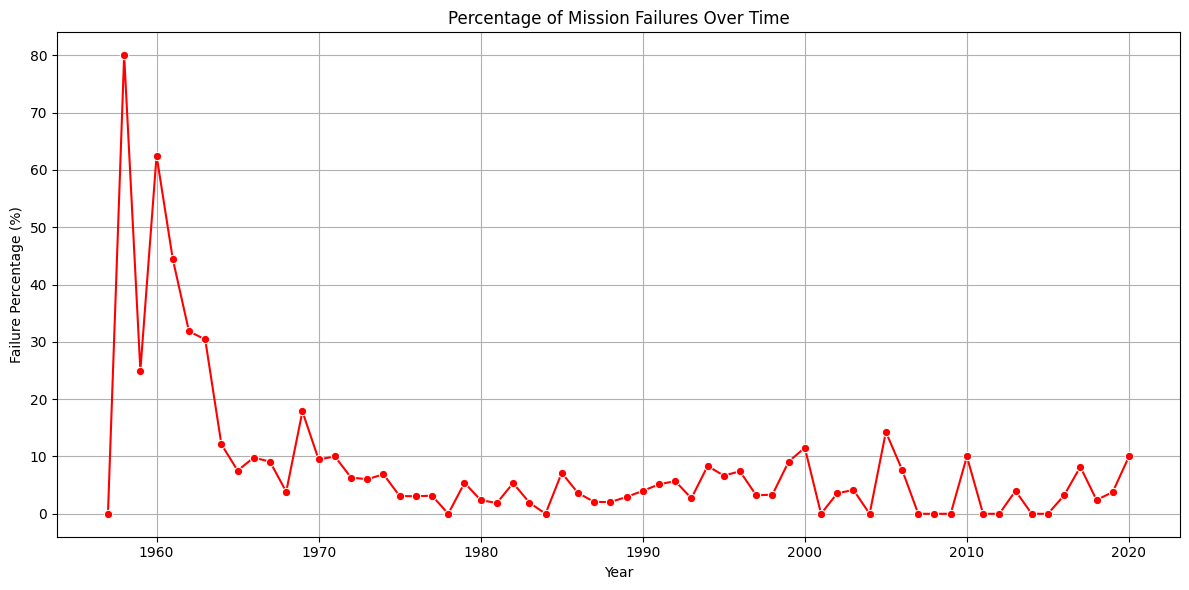

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Failure_Percentage', data=failure_percentage_by_year, marker='o', color='red')
plt.title('Percentage of Mission Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [92]:
# Filter data up to 2020
df_filtered = df_clean[df_clean['Date'].dt.year <= 2020]

# Total Launches
# Group by year and country, count launches, and get the leading country
total_launches_by_year = df_filtered.groupby(['Date', 'Country'])['Mission_Status'].count().reset_index()
total_launches_by_year = total_launches_by_year.loc[total_launches_by_year.groupby(total_launches_by_year['Date'].dt.year)['Mission_Status'].idxmax()]
total_launches_by_year['Year'] = total_launches_by_year['Date'].dt.year

# Successful Launches
# Filter for successful launches
successful_launches_df = df_filtered[df_filtered['Mission_Status'] == 'Success']

# Group by year and country, count launches, and get the leading country
successful_launches_by_year = successful_launches_df.groupby(['Date', 'Country'])['Mission_Status'].count().reset_index()
successful_launches_by_year = successful_launches_by_year.loc[successful_launches_by_year.groupby(successful_launches_by_year['Date'].dt.year)['Mission_Status'].idxmax()]
successful_launches_by_year['Year'] = successful_launches_by_year['Date'].dt.year

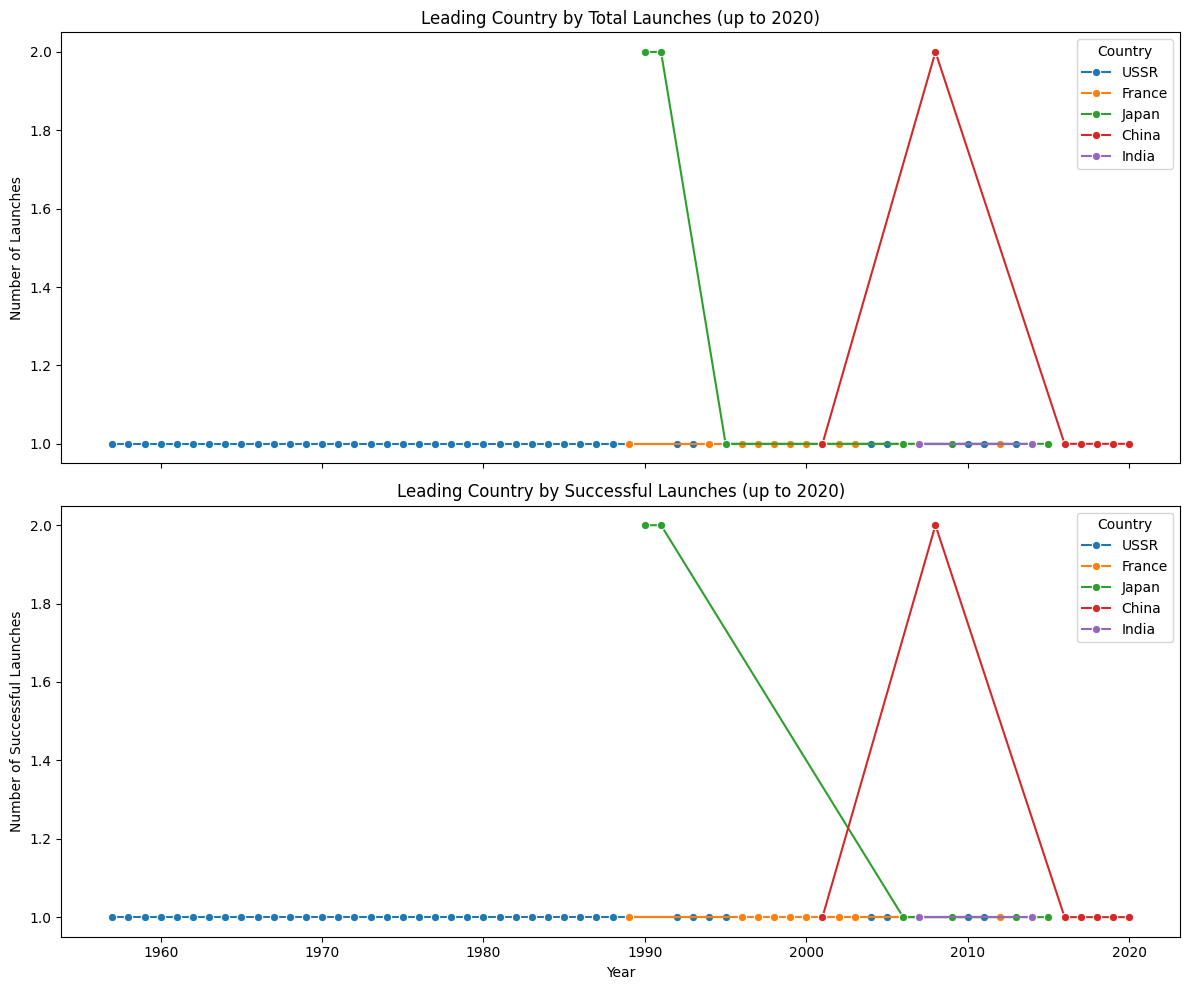

In [93]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Total Launches
sns.lineplot(x='Year', y='Mission_Status', hue='Country', data=total_launches_by_year, marker='o', ax=axes[0])
axes[0].set_title('Leading Country by Total Launches (up to 2020)')
axes[0].set_ylabel('Number of Launches')

# Successful Launches
sns.lineplot(x='Year', y='Mission_Status', hue='Country', data=successful_launches_by_year, marker='o', ax=axes[1])
axes[1].set_title('Leading Country by Successful Launches (up to 2020)')
axes[1].set_ylabel('Number of Successful Launches')

plt.tight_layout()
plt.show()

In [97]:
# Comparison
print("\nComparison:")
total_launches_lead = total_launches_by_year[['Year', 'Country']].rename(columns={'Country': 'Total Launches Lead'})
successful_launches_lead = successful_launches_by_year[['Year', 'Country']].rename(columns={'Country': 'Successful Launches Lead'})
comparison_df = pd.merge(total_launches_lead, successful_launches_lead, on='Year', how='outer')
print(comparison_df)


Comparison:
    Year Total Launches Lead Successful Launches Lead
0   1957                USSR                     USSR
1   1958                USSR                     USSR
2   1959                USSR                     USSR
3   1960                USSR                     USSR
4   1961                USSR                     USSR
..   ...                 ...                      ...
59  2016               China                    China
60  2017               China                    China
61  2018               China                    China
62  2019               China                    China
63  2020               China                    China

[64 rows x 3 columns]
